# Clustering Based on Neural Networks in Wireless Sensor Networks

## 1. Using Random Points and Clustering with KMeans 

In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [10]:
# Generate random nodes for wsn
# We will assume that these points give out signals to the nodes

x1 = 10*np.random.rand(100,2)
print("x1 shape is",x1.shape)
print(x1)

x1 shape is (100, 2)
[[3.54464996e+00 2.09087602e+00]
 [2.88592632e+00 8.92347409e+00]
 [7.75077072e-01 4.70545591e+00]
 [2.04393418e+00 4.29091797e+00]
 [8.44448978e+00 7.19616149e-01]
 [4.21022128e+00 8.94026177e+00]
 [3.41710091e+00 6.97870210e+00]
 [3.39638708e+00 6.00370778e+00]
 [2.40790046e-01 4.28974290e+00]
 [9.22613689e+00 5.81660341e-01]
 [7.10538858e+00 9.75893623e+00]
 [3.88304052e+00 9.17748883e-01]
 [8.98710961e+00 9.83311481e+00]
 [5.60028305e-01 2.86039955e+00]
 [7.18614686e+00 3.81916674e+00]
 [9.53069569e+00 6.68795963e+00]
 [6.28681236e-01 6.89970476e-01]
 [8.60977397e+00 6.46816024e+00]
 [7.87892597e+00 1.49255421e+00]
 [6.47075108e+00 7.90272422e+00]
 [5.10957534e-01 8.77988977e+00]
 [5.62079952e-01 1.50901515e+00]
 [7.91493842e+00 1.80364435e-01]
 [6.33244689e-02 8.18448012e+00]
 [6.22358867e+00 7.97417163e-01]
 [8.66094612e+00 2.92740781e+00]
 [7.90364268e+00 3.37787371e+00]
 [4.73680279e+00 3.86689419e+00]
 [2.72825175e+00 7.76200532e-01]
 [2.55535974e+00 6.384

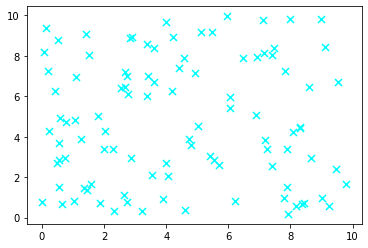

In [42]:
plt.scatter(
    x1[:,0],x1[:,1],
    c='cyan',marker='x',
    edgecolors='black',s=50
)

In [38]:
#Here let us take 4 main nodes to which the signals are sent 
kmean = KMeans(n_clusters=3)
km = kmean
kmean.fit(x1) #Fitting our clusters using KMeans Algorithm

KMeans(n_clusters=3)

In [39]:
kmean.cluster_centers_

array([[7.50515306, 2.91477535],
       [1.7839606 , 2.49660845],
       [4.27736071, 8.00838497]])

In [40]:
y_km = kmean.labels_

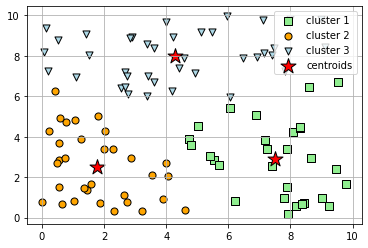

In [41]:
plt.scatter(
    x1[y_km == 0, 0], x1[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x1[y_km == 1, 0], x1[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x1[y_km == 2, 0], x1[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Cluster 1 Inertia 1761.8284289169435
Cluster 2 Inertia 1048.9030058812361
Cluster 3 Inertia 588.4540019470583
Cluster 4 Inertia 380.7670617782663
Cluster 5 Inertia 308.0702962306993
Cluster 6 Inertia 241.33079555364162
Cluster 7 Inertia 201.41926396860669
Cluster 8 Inertia 165.08122289576667
Cluster 9 Inertia 141.34004329193277
Cluster 10 Inertia 125.99212045467813
Cluster 11 Inertia 113.64621625002613
Cluster 12 Inertia 103.08395780283317
Cluster 13 Inertia 94.8432779899442
Cluster 14 Inertia 87.43350840177001
Cluster 15 Inertia 81.21193473313537
Cluster 16 Inertia 74.3730513468895
Cluster 17 Inertia 67.27799647337723
Cluster 18 Inertia 62.094922445731896
Cluster 19 Inertia 56.973413409312734


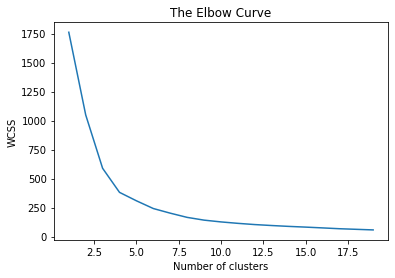

In [19]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(x1)
 wcss.append(kmeans.inertia_)
 print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

- The above plot tells us that 3 clusters are not appropriate enough due to the elbow forming after 3 and somewhere around 5 and the improvement becomes very less there after. So we need more nodes.

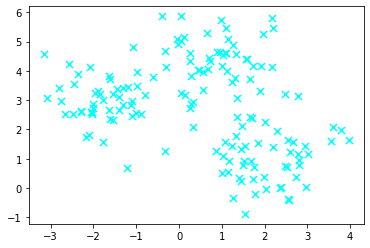

[1 0 0 0 1 0 0 1 2 0 1 2 2 0 0 2 2 1 2 1 0 1 0 0 2 1 1 0 2 1 2 2 2 2 0 1 1
 1 0 0 2 2 0 1 1 1 2 0 2 0 1 0 0 1 1 2 0 1 2 0 2 2 2 2 0 2 0 1 0 0 0 1 1 0
 1 0 0 2 2 0 1 1 0 0 1 1 1 2 2 1 1 0 1 0 1 0 2 2 1 1 1 1 2 1 1 0 2 0 0 0 2
 0 1 2 0 2 0 0 2 2 0 1 0 0 1 1 2 1 2 2 2 2 1 2 2 2 0 2 1 2 0 0 1 1 2 2 2 2
 1 1]


In [54]:
#sample wsn points
X,y = make_blobs(
    n_samples=150 ,n_features=2,
    centers=3,cluster_std=0.8,
    shuffle=True, random_state=0
)

#plot of sample wsn points

plt.scatter(
    X[:,0],X[:,1],
    c='cyan',marker='x',
    edgecolors='black',s=50
)

plt.show()
print(y)

In [33]:
#Applying clustering assuming 3 nodes

km = KMeans(
    n_clusters=3,init='random',
    n_init=10,max_iter=300,
    tol=1e-04,random_state=0
)

y_km = km.fit_predict(X)

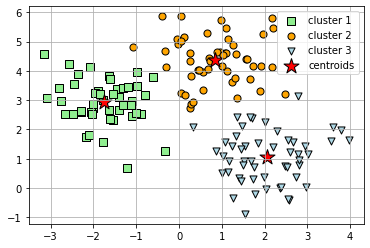

In [34]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

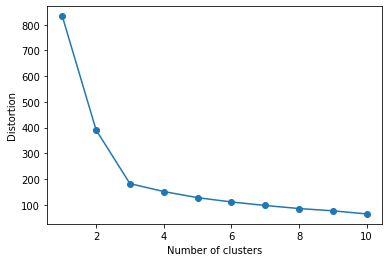

In [35]:
# Using Elbow method to determine appropriate number of clusters

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

- The above plot tells us that 3 clusters are appropriate enough due to the elbow forming at 3 and the improvement becomes very less there after

# 3. Using Hierarchical Clustering to combine the points

In [43]:
from scipy.cluster.hierarchy import dendrogram,linkage
from matplotlib import pyplot as plt

[[ 2.9349952   1.42187464]
 [ 0.26604148  2.71915015]
 [ 0.69794036  4.4288665 ]
 [ 0.25989683  4.61330933]
 [ 2.95657626  0.03371845]
 [ 1.96050262  5.26569121]
 [ 2.20249345  5.47927434]
 [ 2.56737274 -0.39590118]
 [-2.47799142  2.51242918]
 [ 2.16687183  5.82049867]
 [ 3.78585628  1.96688602]
 [ 0.31622934  2.0698696 ]
 [-2.03685363  2.60006481]
 [ 0.56854833  3.95332789]
 [-0.3278886   4.67401313]
 [-2.28246102  2.58984251]
 [-1.44872404  3.38424521]
 [ 1.75992205  0.70616032]
 [-1.63320848  2.67964956]
 [ 2.02384127 -0.03681114]
 [ 0.43830172  4.0161448 ]
 [ 2.67269996  1.55646698]
 [ 1.22672424  3.62051074]
 [ 1.09150494  5.46720613]
 [-1.11005211  2.45725189]
 [ 2.47388885  0.76042659]
 [ 2.54653102  1.635429  ]
 [ 1.34880003  3.07479238]
 [-3.15145159  4.56947655]
 [ 1.1372926   0.54740762]
 [-1.63566377  3.82739535]
 [-2.00475687  2.72754488]
 [-0.89784164  2.54474698]
 [-1.89778079  3.30306744]
 [-0.02596621  4.92577961]
 [ 1.46361712  2.13207534]
 [ 3.54931469  1.62249939]
 

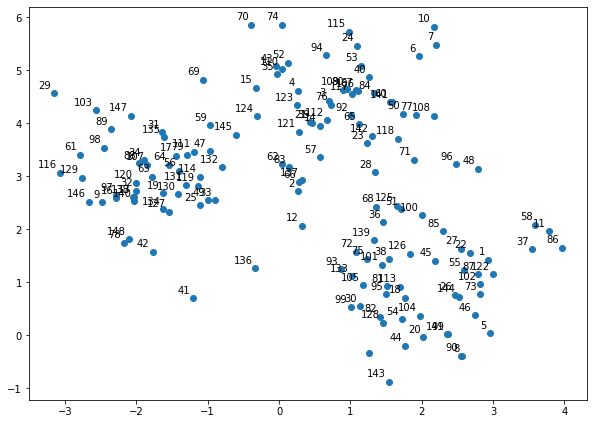

In [70]:
X,y_true = make_blobs(
    n_samples=150 ,n_features=2,
    centers=3,cluster_std=0.8,
    shuffle=True, random_state=0
)
print(X)
print(y)
labels = range(1, 150)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

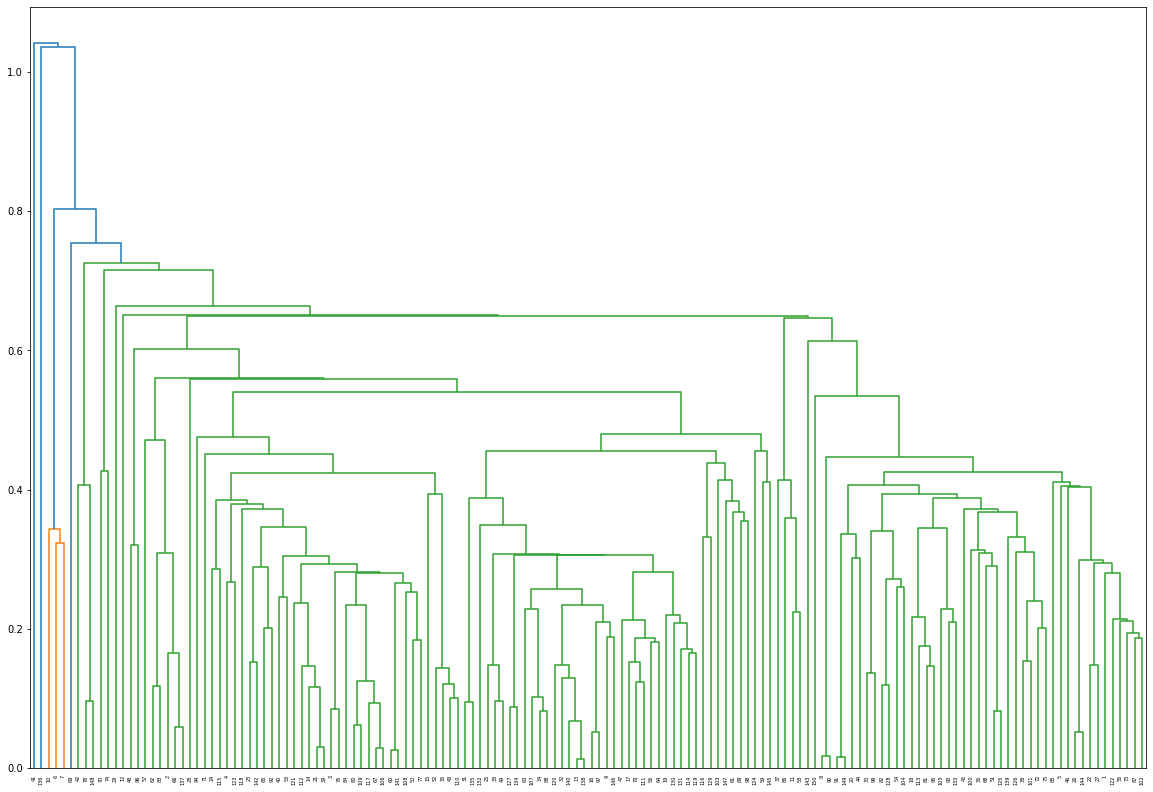

In [60]:
linked = linkage(X,'single')

labelList = range(1,151)

plt.figure(figsize=(20,14))
dendrogram(linked,orientation='top',labels=labelList,distance_sort='descending',show_leaf_counts = True)
plt.show()

In [72]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_pred = cluster.fit_predict(X)

In [73]:
y_true==y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,

- We can see above that a lot of points have been clustered correctly and agglomerative clustering has worked

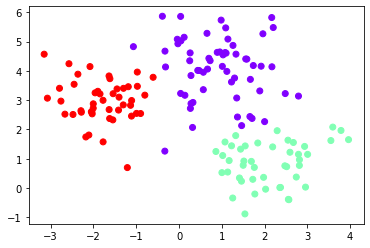

In [74]:
plt.scatter(X[:,0],X[:,1],c=cluster.labels_,cmap = 'rainbow')